# Section A

## 1.  Research Question

## 2.  Business Relevance

## 3.  Relevant Data

# Section B

## 1.  Statistical Testing

In [1]:
# read churn_clean dataset into pandas DataFrame
# import pandas for analysis and data manipulation
import pandas as pd

df = pd.read_csv('source files/churn_clean.csv')


# isolate features relevant to research question
df = df.loc[:, ['Area', 'Outage_sec_perweek', 'MonthlyCharge', 'Churn']]
df.head(5)

,Area,Outage_sec_perweek,MonthlyCharge,Churn
0,Urban,7.978323,172.455519,No
1,Urban,11.699080,242.632554,Yes
2,Urban,10.752800,159.947583,No
3,Suburban,14.913540,119.956840,No
4,Suburban,8.147417,149.948316,Yes


In [2]:
# apply label encoding to Area column
## area_values = {'Urban':0, 'Suburban':1, 'Rural':2}
## df.replace(area_values, inplace=True)

In [3]:
# apply ordinal encoding to Churn column
## churn_values = {'No':0, 'Yes':1}
## df.replace(churn_values, inplace=True)

In [4]:
# verify encoding was applied
## df.head(5)

## 2.  Output

## 3.  Justification

# Section C

## Visualization of Univariate Statistics

In [6]:
# import seaborn and matplotlib for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

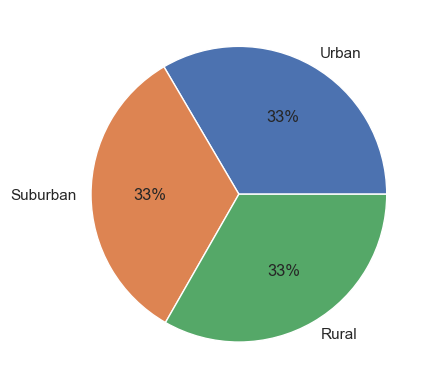

In [14]:
# Draw a piechart of Area
# Count number of records by Area type
data = df['Area'].value_counts()
sns.set_theme()
plt.pie(data, labels=['Urban', 'Suburban', 'Rural'], autopct='%.0f%%')
plt.show()

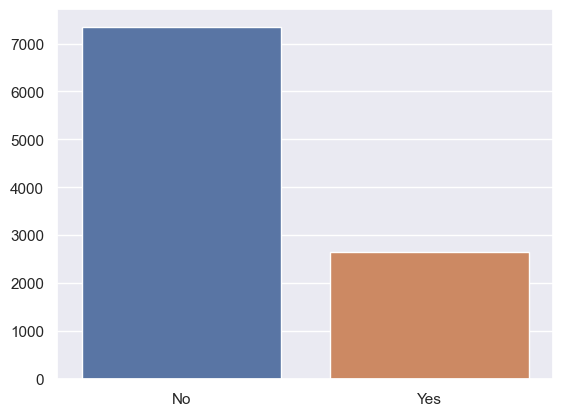

In [15]:
# Draw a barplot of Churn
# Count number of records by customer Churn
data = df['Churn'].value_counts()
sns.barplot(x=data.index, y=data.values)
plt.show()

In [31]:
data = df[['Area', 'Churn']].value_counts()
data

Area      Churn
Suburban  No       2473
Rural     No       2464
Urban     No       2413
          Yes       914
Suburban  Yes       873
Rural     Yes       863
dtype: int64

In [32]:
# Draw a barplot of Area and Churn

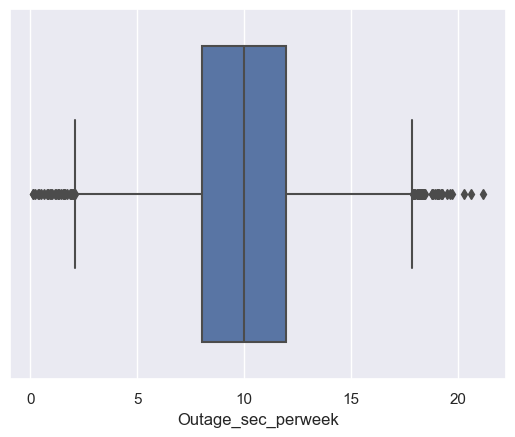

In [8]:
# Draw a boxplot of Outage_sec_perweek
sns.boxplot(x='Outage_sec_perweek', data=df)
plt.show()

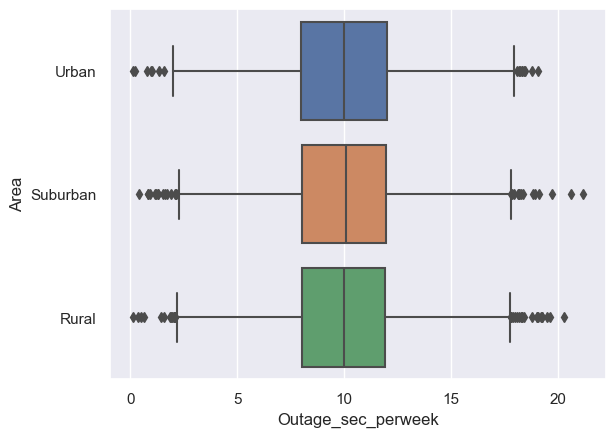

In [7]:
# Draw a boxplot of Outage_sec_perweek by Area
sns.boxplot(x='Outage_sec_perweek', y='Area', data=df)
plt.show()

# Section D

## Visualization of Bivariate Statistics

# Section E

## 1. Results

## 2. Limitations

## 3. Next Steps

# Section F

# Panopto Recording

# Section G
## Web Sources

# Section H
## References